# Getting familiar with *music21*

Audio to MIDI is [NOT](https://stackoverflow.com/questions/46394954/is-it-possible-to-analyze-mp3-file-using-music21) quite [possible](https://wiki.audacityteam.org/wiki/Midi#Converting_from_audio_formats_to_MIDI) right now. Such a shame :/. This limits our data A LOT. The `audioSearch` package from `music21` is not there yet... The only way it works is for single-voice monophonic audios (melodies with only one note at a time)... otherwise the combined frequencies messes up the whole thing. It may be possible using Deep Learing, but it would be a project on its own, and possibly out of scope. Audio source separation is considered to be a very difficult topic. TODO: find out more about this... and check out 6.3.1.2, 6.3.2.3, 6.9.3.2 and 7.2 for more, but I think it's out of scope. (sections are from the source provided on `README.md`). 

MIDI files, apart from being much more rare, are also missing the expresivness of the musician, and maybe something else. TODO: find out if there is some more data missing. 

We could also use some other types of files, as long as the way *music21* processes them is similar. For now let's try with MIDI.

## Creating Music

In [1]:
import music21 as ms

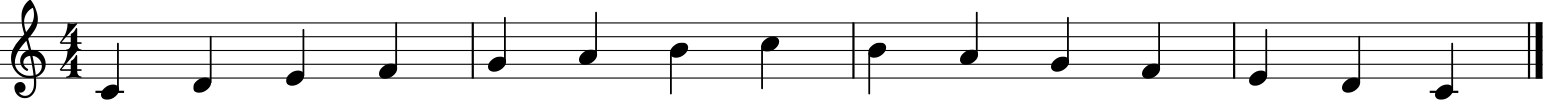

In [2]:
# Creats the C major scale 
stream = ms.stream.Stream()
scale = ["C", "D", "E", "F", "G", "A", "B"]
for note in scale + ["C5"] + scale[::-1]:
    stream.append(ms.note.Note(note))
# Shows on a score
stream.show()

*[music21](https://web.mit.edu/music21/doc/index.html)* uses the [scientific pith notation](https://en.wikipedia.org/wiki/Scientific_pitch_notation). The defaults are the fourth octave.

In [3]:
stream.show("text")

{0.0} <music21.note.Note C>
{1.0} <music21.note.Note D>
{2.0} <music21.note.Note E>
{3.0} <music21.note.Note F>
{4.0} <music21.note.Note G>
{5.0} <music21.note.Note A>
{6.0} <music21.note.Note B>
{7.0} <music21.note.Note C>
{8.0} <music21.note.Note B>
{9.0} <music21.note.Note A>
{10.0} <music21.note.Note G>
{11.0} <music21.note.Note F>
{12.0} <music21.note.Note E>
{13.0} <music21.note.Note D>
{14.0} <music21.note.Note C>


In [4]:
stream[0]

<music21.note.Note C>

In [5]:
stream[0].nameWithOctave

'C'

In [6]:
stream[7].nameWithOctave

'C5'

In [7]:
stream[2].offset

2.0

In [8]:
stream.duration

<music21.duration.Duration 15.0>

In [9]:
# This doesn't work on my Jupyter but might work on yours (it does work when running a script `.py`)
#stream.show("midi")
# It should actually play the sound

Each note comes with an offset, that tells the temporal position of the note on the `Stream` object. There are other attributes to a `Note` object.

In [10]:
print(stream[0].duration, stream[0].duration.type)

<music21.duration.Duration 1.0> quarter


Duration is very important. All our notes had quarter duration. Let's make a note with half duration:

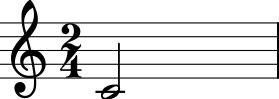

In [11]:
nt = ms.note.Note("C")
nt.duration = ms.duration.Duration("half")
nt.show()

In [12]:
print(nt.duration, nt.duration.type)

<music21.duration.Duration 2.0> half


Now let's create accompainment. To do this we embed our previous stream within a stream, which will also contain another stream corresponding to the left hand playing. 

In [13]:
two_voices_stream = ms.stream.Stream()
two_voices_stream.append(stream)  # stream is the first voice/right hand
second_voice_stream = ms.stream.Stream()  # stream for the second voice/left hand
scale_below = ["C3", "D3", "E3", "F3", "G3", "A3", "B3"]
for note in scale_below + ["C"] + scale_below[::-1]:
    second_voice_stream.append(ms.note.Note(note))
two_voices_stream.append(second_voice_stream)
second_voice_stream.offset = 0.0  # We need to manually set the offset of the second stream to 0
two_voices_stream.show("text")

{0.0} <music21.stream.Stream 0xa1c674668>
    {0.0} <music21.note.Note C>
    {1.0} <music21.note.Note D>
    {2.0} <music21.note.Note E>
    {3.0} <music21.note.Note F>
    {4.0} <music21.note.Note G>
    {5.0} <music21.note.Note A>
    {6.0} <music21.note.Note B>
    {7.0} <music21.note.Note C>
    {8.0} <music21.note.Note B>
    {9.0} <music21.note.Note A>
    {10.0} <music21.note.Note G>
    {11.0} <music21.note.Note F>
    {12.0} <music21.note.Note E>
    {13.0} <music21.note.Note D>
    {14.0} <music21.note.Note C>
{0.0} <music21.stream.Stream 0xa1c68e550>
    {0.0} <music21.note.Note C>
    {1.0} <music21.note.Note D>
    {2.0} <music21.note.Note E>
    {3.0} <music21.note.Note F>
    {4.0} <music21.note.Note G>
    {5.0} <music21.note.Note A>
    {6.0} <music21.note.Note B>
    {7.0} <music21.note.Note C>
    {8.0} <music21.note.Note B>
    {9.0} <music21.note.Note A>
    {10.0} <music21.note.Note G>
    {11.0} <music21.note.Note F>
    {12.0} <music21.note.Note E>
    {13.0} <

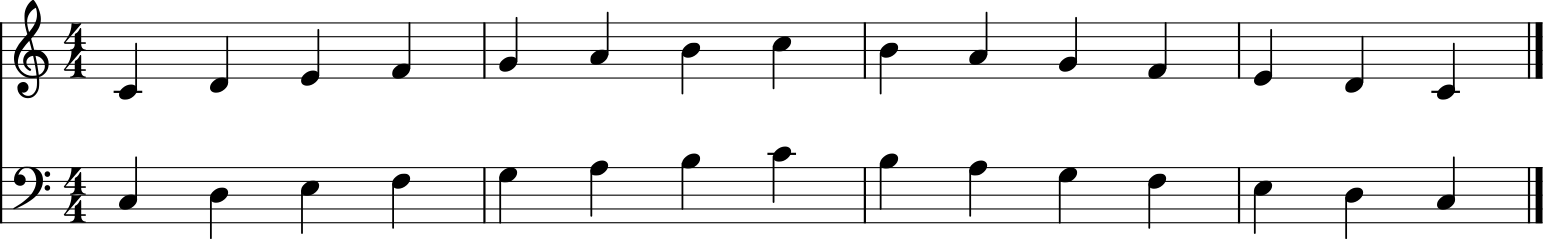

In [14]:
two_voices_stream.show()

Another thing an actual music file will contain will be `Rest` objects:

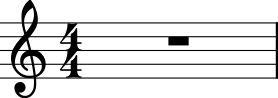

In [15]:
r = ms.note.Rest(type='whole')
r.show()

In [16]:
print(r.duration, r.duration.type)

<music21.duration.Duration 4.0> whole


Rests in music are obviously very important and probably need to be encoded too in our representation to feed it onto the ANN (we will need to figure this out later).

## Loading .mid files, Converting back to .mid and Some Exploring

In [17]:
bach = ms.converter.parse("bach_846.mid")
bach

<music21.stream.Score 0xa1c767438>

First let's try to get back the `.mid` file from the `Score` object.

In [18]:
bach.write("midi", "complete-bach_846.mid")

'complete-bach_846.mid'

It works! (Open the file on your computer and check). Now let's explore the `Score` object.

In [19]:
list(bach)

[<music21.stream.Part 0xa1c75f8d0>,
 <music21.stream.Part 0xa1cb43630>,
 <music21.stream.Part 0xa1cbd2a90>,
 <music21.stream.Part 0xa1c698748>,
 <music21.stream.Part 0xa1cd657b8>,
 <music21.stream.Part 0xa1ce20e48>]

In [20]:
bach[0]

<music21.stream.Part 0xa1c75f8d0>

Each part corresponds to a different voice/hand. Let's inspect the right hand (not fully, as this is quite long)

In [21]:
bach[0][:20].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=74.0>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Rest rest>
{0.5} <music21.note.Note G>
{0.75} <music21.note.Note C>
{1.0} <music21.tempo.MetronomeMark Quarter=75.5>
{1.0} <music21.note.Note E>
{1.25} <music21.tempo.MetronomeMark andante Quarter=74.0>
{1.25} <music21.note.Note G>
{1.5} <music21.note.Note C>
{1.75} <music21.note.Note E>
{2.0} <music21.note.Rest rest>
{2.5} <music21.note.Note G>
{2.75} <music21.note.Note C>
{3.0} <music21.note.Note E>
{3.25} <music21.tempo.MetronomeMark Quarter=75.0>
{3.25} <music21.note.Note G>
{3.5} <music21.note.Note C>


We can see that there is info for which instrument should be played (pontetially to be omitted in our encoding), the [tempo](https://en.wikipedia.org/wiki/Tempo), the [key](https://en.wikipedia.org/wiki/Key_(music)), the [time signature](https://en.wikipedia.org/wiki/Time_signature) and then notes and rests, with some changes in the tempo between these. We will need to figure out how which of these data points we keep, and how to encode them. For the left hand, we also have `Chord` objects. To filter them, see below.

Getting only the notes, rests and chords, for the first two voices.

In [22]:
two_hands = ms.stream.Stream()

right_hand = []  # Create an empty list instead of an empty stream
right_hand.append(ms.tempo.MetronomeMark("andante", 74))  # Set the tempo as fixed at the beginning
right = iter(bach[0])
right.filters.append(ms.stream.filters.ClassFilter(["Rest", "Note", "Chord"]))
for note in right:
    right_hand.append(note)
right_hand = ms.stream.Stream(right_hand)  # And convert at the end, otherwise it messes up the order
# This Needs more playing-with
    
left_hand = []
left = iter(bach[1])
left.filters.append(ms.stream.filters.ClassFilter(["Rest", "Note", "Chord"]))
for note in left:
    left_hand.append(note)
left_hand = ms.stream.Stream(left_hand)

two_hands.append(right_hand)
two_hands.append(left_hand)
left_hand.offset = 0.0
two_hands.write("midi", "bach_846-first_two_voices_fixed_tempo.mid")

'bach_846-first_two_voices_fixed_tempo.mid'

`bach_846-first_two_voices_fixed_tempo.mid` should be have the same notes as to `bach_846.mid`, but only for the first two voices and with a fixed *andante 74* tempo. You can check this by opening the file and comparing with the original.

# Encoding & Decoding

Note -> For each note, one component of $\bar{p}$ (`.nameWithOctave`)  
Note Hold/Ending -> Hold = Tied to the previous note. Get from duration of notes longer than `"64th"`.  
Rest -> One extra dimension for rest on $\bar{p}$. (`if note.isRest`)  
Tempo -> One extra dimension (global tempo for now). Integer beats per minute  
Rythm  -> `.TimeSignature()?`.  [Seems like we do not need this](https://music.stackexchange.com/questions/3346/what-is-the-connection-between-time-signature-beat-and-tempo). I changed the `.TimeSignature()` in the decoder and it has no effect. It is only for [readability purposes](https://www.youtube.com/watch?v=mlZVQbFW0JA). Then Tempo [seems to be enough](https://www.youtube.com/watch?v=bAK5-pUxSDE)? Being doing a little research and Tempo and Rythm are not exactly the same thing, but it seems the Rythm cannot really be defined with a precise meassure. Rythm is actually a recognizable pattern that you can find in any piece of music, which results from a combination of the tempo and the notes that are being played and their durations.  
Multivoice/Different Instrument -> Mmm...  TODO!: in progress.  
Note Intensity -> One extra dimension (`.volume.velocity`? or `.volume.realized`?)  TODO!  
Key -> I don't think it matters. I checked on the decoding part using different keys and it produces the same notes. [Read this](https://en.wikipedia.org/wiki/Key_(music)) for it to make more sense, but it's basically [the tone](https://www.youtube.com/watch?v=6rHyM-oPqjw) of the whole piece. However, as each note in MIDI file has all the info, this does not seem relevant for us.  
Time step ($\bar{p}_{t_0}$, $\bar{p}_{t_1}$) -> $t_1 - t_0$ will be the shortest note duration (`"64th"` or 0.05 as `.quarterLength`). Some `.quarterLength` durations are not multiples of 0.05, so for example, if the `.quarterLength=0.33`, the vectors needed to encode this note would be 6.6, but we decided to keep them at 6.

Let's inspect the right hand of `bach` in more detail

In [23]:
bach[0][:20].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=74.0>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Rest rest>
{0.5} <music21.note.Note G>
{0.75} <music21.note.Note C>
{1.0} <music21.tempo.MetronomeMark Quarter=75.5>
{1.0} <music21.note.Note E>
{1.25} <music21.tempo.MetronomeMark andante Quarter=74.0>
{1.25} <music21.note.Note G>
{1.5} <music21.note.Note C>
{1.75} <music21.note.Note E>
{2.0} <music21.note.Rest rest>
{2.5} <music21.note.Note G>
{2.75} <music21.note.Note C>
{3.0} <music21.note.Note E>
{3.25} <music21.tempo.MetronomeMark Quarter=75.0>
{3.25} <music21.note.Note G>
{3.5} <music21.note.Note C>


## Note Encoding

In [24]:
import numpy as np

There are 10 octaves, from 0 to 9. The first note is `"C0"` and the last note is `"C9"`. For the piano, is `"A0"` from `"C8"`. Let's use frequencies so we don't have to distinguish between "#" and "b".

In [25]:
ms.note.Note("Bb").pitch.frequency

466.1637615180899

In [26]:
ms.note.Note("A#").pitch.frequency

466.1637615180899

In [27]:
# Gets a NumPY array with the different note frequencies.
notes_freq = [ms.note.Note(note).pitch.frequency for note in ["A0", "A#0"]]
s = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
for i in range(1, 8):
    notes_freq += [ms.note.Note(note + str(i)).pitch.frequency for note in s]
notes_freq.append(ms.note.Note("C8").pitch.frequency)
notes_freq = np.array(notes_freq)
notes_freq.shape

(87,)

In [28]:
nt = bach[0][5]
if type(nt) == ms.note.Note:
    note_encoded = (notes_freq == nt.pitch.frequency)*1
print(note_encoded.shape)
note_encoded

(87,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Rest Encoding

Let's add one extra dimension at the bottom of the array to include rests

In [29]:
if type(nt) == ms.note.Rest:
    note_encoded = np.append(note_encoded, 1)
else:
    note_encoded = np.append(note_encoded, 0)
print(note_encoded.shape)
note_encoded

(88,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Tempo Encoding

In [30]:
if type(bach[0][1]) == ms.tempo.MetronomeMark:
    tempo = bach[0][1].number
tempo

74.0

In [31]:
note_encoded = np.append(note_encoded, tempo)
print(note_encoded.shape)

(89,)


## Hold/End Encoding

Because each vector will contain note/s that last for "64th", we need to include a hold binary value to represent notes that last longer. For example, if we have a note that lasts "32th" and we don't do this, we will end up with two vectors with the same note and it will be interpreted as two notes of duration "64th" instead of one note of duration "32th".

In [32]:
time_step = 0.05

In [33]:
bach[1][0:10].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note C>
{0.25} <music21.note.Note E>
{2.0} <music21.note.Note C>
{2.25} <music21.note.Note E>
{4.0} <music21.note.Note C>
{4.25} <music21.note.Note D>
{6.0} <music21.note.Note C>


In [34]:
nt1 = bach[1][6]
nt1.offset

2.25

In [35]:
nt1.duration.quarterLength

1.75

In [36]:
if type(nt1) == ms.note.Note:
    note_encoded = (notes_freq == nt.pitch.frequency)*1
    n_vectors = int(nt1.duration.quarterLength/0.05)
    for i in range(n_vectors - 1):
        print(np.append(note_encoded, 1))
    print(np.append(note_encoded, 0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

## Putting it all together

In [37]:
bach[1][0:7].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note C>
{0.25} <music21.note.Note E>
{2.0} <music21.note.Note C>
{2.25} <music21.note.Note E>


In [38]:
strem = ms.stream.Stream()
strem += bach[1][:3]
strem.append(ms.tempo.MetronomeMark("andante"))
strem += bach[1][3:7]
strem.show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=72>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note C>
{0.25} <music21.note.Note E>
{2.0} <music21.note.Note C>
{2.25} <music21.note.Note E>


In [39]:
strem[4].duration

<music21.duration.Duration 2.0>

In [40]:
strem[4].offset

0.0

In [41]:
strem[5].duration

<music21.duration.Duration 1.75>

In [42]:
strem[5].offset

0.25

In [43]:
strem[7].offset

2.25

In [44]:
strem[7].duration.quarterLength

1.75

The limitation of the following code is that, when two notes are being played at the same time but didn't start at the same time, the hold will be the same for both, even if it is actually not, because they will be combined on a single vector $\bar{p}_t$.

TODO: Figure out how to fix this, although it doesn't sound that relevant.

In [45]:
notes = np.zeros((int((strem[7].offset + strem[7].duration.quarterLength) /time_step), 90))
temp_flag = True
idx = -1
for nt in strem:
    if type(nt) == ms.note.Note or type(nt) == ms.note.Rest:
        idx = int(nt.offset/time_step)
    # Tempo Encoding
    if temp_flag:
        if type(nt) == ms.tempo.MetronomeMark:
            notes[:, 89] = nt.number
            temp_flag = False
    if idx >= 0:
        for i in range(int(nt.duration.quarterLength/time_step) - 1):
        # Note encoding
            if type(nt) == ms.note.Note:
                notes[idx + i, :87] += (notes_freq == nt.pitch.frequency)*1
        # Rest Encoding
            if type(nt) == ms.note.Rest:
                notes[idx + i, 87] = 1 
        # Hold Encoding
            notes[idx + i, 88] = 1
        notes[idx + i, 88] = 0

In [46]:
notes[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 72.])

In [47]:
notes[1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 72.])

In [48]:
notes[2]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 72.])

In [49]:
notes[3]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 72.])

In [50]:
notes[4]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 72.])

In [51]:
notes[5]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 72.])

In [52]:
notes[6]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 72.])

In [53]:
notes[7]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 72.])

In [54]:
notes[8]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 72.])

Looks good! Now we need to decode to convert back to MIDI

## Decode

In [55]:
strem.show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=72>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note C>
{0.25} <music21.note.Note E>
{2.0} <music21.note.Note C>
{2.25} <music21.note.Note E>


In [56]:
stream = ms.stream.Stream()
stream.append(ms.instrument.Piano())
stream.append(ms.tempo.MetronomeMark(number=int(notes[0][-1])))
stream.append(ms.key.Key("C"))
stream.append(ms.meter.TimeSignature())

In [57]:
stream.show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=72>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>


In [58]:
notes_freq * notes[0][:87]

array([  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       , 261.6255653,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0. 

In [59]:
np.nonzero(notes_freq * notes[0][:87])[0]

array([38])

In [60]:
notes_letters = ["A0", "A#0"]
s = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
for i in range(1, 8):
    notes_letters += [note + str(i) for note in s]
notes_letters.append("C8")
nt = ms.note.Note(notes_letters[int(np.nonzero(notes_freq * notes[0][:87])[0])])

In [61]:
nt.offset = 0
dur = time_step
if notes[0][-2]:
    i = 1
    dur += time_step
    while notes[i][-2]:
        dur += time_step
        i += 1
nt.duration = ms.duration.Duration(dur + time_step)
nt

<music21.note.Note C>

In [62]:
print(nt.nameWithOctave, strem[4].nameWithOctave)

C4 C4


In [63]:
print(nt.offset, strem[4].offset)

0.0 0.0


In [64]:
print(nt.duration, strem[4].duration)

<music21.duration.Duration 2> <music21.duration.Duration 2.0>


In [65]:
notes[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 72.])

In [66]:
notes[1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 72.])

In [67]:
np.nonzero(notes_freq * notes[1][:87])

(array([38]),)

In [68]:
stream = ms.stream.Stream()
stream.append(ms.instrument.Piano())
stream.append(ms.tempo.MetronomeMark(number=int(notes[0][-1])))
stream.append(ms.key.Key("C"))
stream.append(ms.meter.TimeSignature())

In [69]:
a = ms.stream.Stream()
nt = ms.note.Note("A")
nt.offset = 0
nt.duration = ms.duration.Duration(2)
a.append(nt)
a.show("text")

{0.0} <music21.note.Note A>


In [70]:
nt = ms.note.Note("B")
nt.duration = ms.duration.Duration(2)
a.append(nt)
a[-1].offset = 0.25
a.show("text")

{0.0} <music21.note.Note A>
{0.25} <music21.note.Note B>


In [71]:
a[1].duration

<music21.duration.Duration 2.0>

In [72]:
stream = ms.stream.Stream()
stream.append(ms.instrument.Piano())
stream.append(ms.tempo.MetronomeMark(number=int(notes[0][-1])))
stream.append(ms.key.Key("C"))
stream.append(ms.meter.TimeSignature())

In [73]:
strem.show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=72>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note C>
{0.25} <music21.note.Note E>
{2.0} <music21.note.Note C>
{2.25} <music21.note.Note E>


Alright, looks like it's working!! Let's create the functions and try it out

In [74]:
def encode(hand, tempo=None):
    
    """
    Many-hot-encoding of a hand of a musical piece
    :param hand: a music21 stream for piano instrument
    :param tempo: to set a tempo for a left hand
    when it follows the tempo for the right hand
    :returns: encoded ordered temporal vectors
    Each vector corresponds to a time_step=16th
    Components 0 to 87 are the notes in ascending
    frequency order. Component 88 = 1 if there is
    a rest. Component 89 indicates hold, to account
    for notes with duration longer than 16th. Last
    component (90) is the tempo, as integer from ...
    NOTE: This works on only one hand (stream which 
    does not contain any other streams)
    """
    
    # Gets a NumPy array with all the frequency of the piano notes
    notes_freq = [ms.note.Note(note).pitch.frequency for note in ["A0", "A#0"]]
    s = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    for i in range(1, 8):
        notes_freq += [ms.note.Note(note + str(i)).pitch.frequency for note in s]
    notes_freq.append(ms.note.Note("C8").pitch.frequency)
    notes_freq = np.array(notes_freq)
    
    # To get the type duration based on the duration of the note
    #types_mapping = {"64th": 1, "32nd": 2, "16th": 4, "eighth": 8,
    #             "quarter": 16, "half": 32, "whole": 64, 
    #             "breve": 128, "longa": 256, "maxima": 512}
    
    # Gets the time step. Each vector will contain note/s of 64th length 
    time_step = 0.05
    
    # Gets the numpy array to store all the encoded notes, rests, holds and tempo
    for nt in hand[::-1]:  # To do so, we need to get the offset
        try:  # of the last note/rest, together with its duration
            size = nt.offset + nt.duration.quarterLength
            break
        except:
            pass
    #print(size)
    notes = np.zeros((int(size/time_step), 90))
    #print(notes.shape)
    
    # To use the tempo of a right hand on the left hand
    if tempo:
        notes[:, 89] = tempo
    
    # Encodes all the music
    # This flag will be used to only get the tempo of the beginning of the piece
    temp_flag = True  # And assign this tempo to all the notes in the piece
    idx = -1  # To only append notes, rests or chords
    for nt in hand:
        if type(nt) == ms.note.Note or type(nt) == ms.note.Rest or type(nt) == ms.chord.Chord:
            idx = int(nt.offset/time_step)  # Temporal index
        # Tempo Encoding
        if temp_flag:
            if type(nt) == ms.tempo.MetronomeMark:
                notes[:, 89] = nt.number
                temp_flag = False
        if idx >= 0:
            #print("idx", idx)
            n_vectors = int(nt.duration.quarterLength/time_step) #types_mapping[nt.duration.type]
            # Loops over the duration of the note (if a note is 8th
            # we need to put this note in two consecutive vector)
            #print(n_vectors)
            for i in range(n_vectors):
                #print(nt, idx, i)
                # Note encoding: one/many-hot encoding
                if type(nt) == ms.note.Note:
                    notes[idx + i, :87] += (notes_freq == nt.pitch.frequency)*1
                # Rest Encoding: one-hot encoding
                if type(nt) == ms.note.Rest:
                    notes[idx + i, 87] = 1
                # Chord Encoding: many-hot encoding
                if type(nt) == ms.chord.Chord:
                    for freqs in [nts.frequency for nts in nt.pitches]:
                        notes[idx + i, :87] += (notes_freq == freqs)*1
                # Hold Encoding: If the duration of the note is longer than 16th
                notes[idx + i, 88] = 1
            notes[idx + i, 88] = 0
        idx = -1
            
    return notes

In [75]:
bach[0][:10].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=74.0>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Rest rest>
{0.5} <music21.note.Note G>
{0.75} <music21.note.Note C>
{1.0} <music21.tempo.MetronomeMark Quarter=75.5>
{1.0} <music21.note.Note E>
{1.25} <music21.tempo.MetronomeMark andante Quarter=74.0>


In [76]:
notes_encoded = encode(bach[0][:10])

In [77]:
def decode(notes_encoded, tempo=74):
    
    """
    Returns the encoded notes by encode()
    to the original music21 notation
    to get the MIDI file back
    :param: notes_encoded: ordered temporal
    vectors in a 2D NumPy array, where
    each row is representes the music at certain time
    :param: tempo
    :returns: music21 stream object
    """
    
    # Gets the music21 letter representation of the notes pitches
    notes_letters = ["A0", "A#0"]
    s = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    for i in range(1, 8):
        notes_letters += [note + str(i) for note in s]
    notes_letters.append("C8")
    # Gets a NumPy array with all the frequency of the piano notes
    notes_freq = [ms.note.Note(note).pitch.frequency for note in ["A0", "A#0"]]
    s = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    for i in range(1, 8):
        notes_freq += [ms.note.Note(note + str(i)).pitch.frequency for note in s]
    notes_freq.append(ms.note.Note("C8").pitch.frequency)
    notes_freq = np.array(notes_freq)
    
    # Creates the stream object and appends some default (TODO) stuff 
    stream = ms.stream.Stream()
    stream.append(ms.instrument.Piano())
    if notes_encoded[0, -1]:  # If we encode and decode the left hand by separate
        stream.append(ms.tempo.MetronomeMark(number=int(notes_encoded[0, -1])))
    else:  # It will have tempo=0, so we need this. TODO: Make thi
        stream.append(ms.tempo.MetronomeMark(number=tempo))
    stream.append(ms.key.Key("C"))
    stream.append(ms.meter.TimeSignature())
    
    time_step = 0.05
    
    offset = 0
    hold = {}  # Will store the duration of the hold for each note
    for j, p in enumerate(notes_encoded):
        if p[87]:  # If we have a Rest, do the same as below
            try:
                if offset < hold[87]:
                    offset += 0.05
                    continue
            except:
                pass
            nt = ms.note.Rest()
            dur = time_step
            if p[-2]:  
                i = j + 1  
                dur += time_step
                while notes_encoded[i][-2]:  
                    dur += time_step
                    i += 1
            hold[87] = dur + offset  
            nt.duration = ms.duration.Duration(dur)
            stream.append(nt)
            stream[-1].offset = offset
        else:
            # For each note on the vector at time = offset
            for frequ_index in np.nonzero(notes_freq * p[:87])[0]:
                try:  # If the duration of the hold + offset is longer than the current offset
                    if offset < hold[frequ_index]:
                        #offset += 0.25
                        continue  # Do not append this note to the stream
                except:  # As it will be the same note appended on the first previous iteration
                    pass
                # Gets the pitch for a note in p
                nt = ms.note.Note(notes_letters[int(frequ_index)])
                # Gets the duration
                dur = time_step
                if p[-2]:  # If we have a hold
                    i = j + 1  # Move onto the next p vector
                    dur += time_step
                    while notes_encoded[i][-2]:  # And do so until the hold dissapears
                        dur += time_step
                        i += 1
                hold[frequ_index] = dur + offset  # Total duration of the hold, from the offset
                nt.duration = ms.duration.Duration(dur)
                # Appends to the stream
                stream.append(nt)
                # Sets the offset (need to do it here)
                stream[-1].offset = offset

        offset += 0.05
                
    # Accounts for chords
    stream_with_chords = ms.stream.Stream()
    stream_with_chords.append(stream[0])
    le = len(stream)
    for i in range(len(stream)-1):
        if type(stream[i]) == ms.note.Note:
            if (stream[i+1].duration.quarterLength, stream[i+1].offset) == (stream[i].duration.quarterLength, stream[i].offset):
                j = i + 1
                notes_in_chord = [stream[i].nameWithOctave]
                while (stream[j].duration.quarterLength, stream[j].offset) == (stream[i].duration.quarterLength, stream[i].offset):
                    notes_in_chord.append(stream[j].nameWithOctave)
                    j += 1
                    if j == le:
                        break
                stream_with_chords.append(ms.chord.Chord(notes_in_chord))
                stream_with_chords[-1].duration = ms.duration.Duration(stream[i].duration.quarterLength)
                stream_with_chords[-1].offset = stream[i].offset
                stream_with_chords.pop(-2)
            else:
                stream_with_chords.append(stream[i+1])
                stream_with_chords[-1].offset = stream[i+1].offset
        else:
            stream_with_chords.append(stream[i+1])
            stream_with_chords[-1].offset = stream[i+1].offset
                
    return stream_with_chords

In [78]:
notes_decoded = decode(notes_encoded)
notes_decoded.show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=74>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Rest rest>
{0.5} <music21.note.Note G>
{0.75} <music21.note.Note C>
{1.0} <music21.note.Note E>


In [79]:
bach[0][:10].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=74.0>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Rest rest>
{0.5} <music21.note.Note G>
{0.75} <music21.note.Note C>
{1.0} <music21.tempo.MetronomeMark Quarter=75.5>
{1.0} <music21.note.Note E>
{1.25} <music21.tempo.MetronomeMark andante Quarter=74.0>


Ok, let's see if we can get the right hand of `"bach_846.mid"` back after encoding it!

In [80]:
notes_encoded = encode(bach[0])
bach_decoded = decode(notes_encoded)
bach_decoded.write("midi", "bach_846-right_hand-decoded.mid")
bach[0].write("midi", "bach_846-right_hand-original.mid")

'bach_846-right_hand-original.mid'

You can open this midi files and see that they are exactly the same, apart from the tempo, which for our encoded and decoded piece is only the one that appears at the beginning. Let's try with the left hand

In [81]:
notes_encoded = encode(bach[1])
bach_decoded = decode(notes_encoded)
bach_decoded.write("midi", "bach_846-left_hand-decoded.mid")
bach[1].write("midi", "bach_846-left_hand-original.mid")

'bach_846-left_hand-original.mid'

Again, the same! Note that the tempo on `"bach_846-left_hand-original.mid"` was lost.

Let's try with another midi file

In [82]:
fur_elise = ms.converter.parse("elise.mid")
fur_elise[0][4]

<music21.stream.Voice 0xa1d73e6d8>

This one has voices inside of the parts, so let's get the first voice. The tempo will also be off because of this. TODO: Include this on the encode and decode functions.

In [83]:
fur_elise = ms.converter.parse("elise.mid")
notes_encoded = encode(fur_elise[0][4])
fur_elise_decoded = decode(notes_encoded)
fur_elise_decoded.write("midi", "elise-right_hand-decoded.mid")
fur_elise[0][4].write("midi", "elise-right_hand-original.mid")

'elise-right_hand-original.mid'

In [84]:
notes_encoded = encode(fur_elise[1])
fur_elise_decoded = decode(notes_encoded)
fur_elise_decoded.write("midi", "elise-left_hand-decoded.mid")
fur_elise[1].write("midi", "elise-left_hand-original.mid")

'elise-left_hand-original.mid'

It works.

## Two parts/voices together

We can do this by *multi-many-hot encoding*, but this would not let us recover which notes are from which voice, and we still have the problem of the hold. Another approach would be what Avi is doing. I'll attempt the *multi-many-hot encoding* below:

In [85]:
bach[0][:10].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=74.0>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Rest rest>
{0.5} <music21.note.Note G>
{0.75} <music21.note.Note C>
{1.0} <music21.tempo.MetronomeMark Quarter=75.5>
{1.0} <music21.note.Note E>
{1.25} <music21.tempo.MetronomeMark andante Quarter=74.0>


In [86]:
bach[1][:10].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note C>
{0.25} <music21.note.Note E>
{2.0} <music21.note.Note C>
{2.25} <music21.note.Note E>
{4.0} <music21.note.Note C>
{4.25} <music21.note.Note D>
{6.0} <music21.note.Note C>


In [87]:
notes_encoded_right = encode(bach[0][:10])
notes_encoded_left = encode(bach[1][:10])
notes_encoded_right[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1., 74.])

In [88]:
notes_encoded_left[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.])

In [89]:
notes_encoded_right[0] + notes_encoded_left[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2., 74.])

In [90]:
def decode(notes_encoded, tempo=74):
    
    """
    Returns the encoded notes by encode()
    to the original music21 notation
    to get the MIDI file back
    :param: notes_encoded: ordered temporal
    vectors in a 2D NumPy array, where
    each row is representes the music at certain time
    :param: tempo
    :returns: music21 stream object
    """
    
    # Gets the music21 letter representation of the notes pitches
    notes_letters = ["A0", "A#0"]
    s = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    for i in range(1, 8):
        notes_letters += [note + str(i) for note in s]
    notes_letters.append("C8")
    # Gets a NumPy array with all the frequency of the piano notes
    notes_freq = [ms.note.Note(note).pitch.frequency for note in ["A0", "A#0"]]
    s = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    for i in range(1, 8):
        notes_freq += [ms.note.Note(note + str(i)).pitch.frequency for note in s]
    notes_freq.append(ms.note.Note("C8").pitch.frequency)
    notes_freq = np.array(notes_freq)
    
    # Creates the stream object and appends some default (TODO) stuff 
    stream = ms.stream.Stream()
    stream.append(ms.instrument.Piano())
    if notes_encoded[0, -1]:  # If we encode and decode the left hand by separate
        stream.append(ms.tempo.MetronomeMark(number=int(notes_encoded[0, -1])))
    else:  # It will have tempo=0, so we need this. TODO: Make thi
        stream.append(ms.tempo.MetronomeMark(number=tempo))
    stream.append(ms.key.Key("C"))
    stream.append(ms.meter.TimeSignature())
    
    time_step = 0.05
    
    offset = 0
    hold = {}  # Will store the duration of the hold for each note
    for j, p in enumerate(notes_encoded):
        if p[87]:  # If we have a Rest, do the same as below
            try:
                if offset < hold[87]:
                    offset += 0.05
                    continue
            except:
                pass
            nt = ms.note.Rest()
            dur = time_step
            if p[-2]:  
                i = j + 1  
                dur += time_step
                while notes_encoded[i][-2]:  
                    dur += time_step
                    i += 1
            hold[87] = dur + offset  
            nt.duration = ms.duration.Duration(dur)
            stream.append(nt)
            stream[-1].offset = offset
        #else:
        # For each note on the vector at time = offset
        for frequ_index in np.nonzero(notes_freq * p[:87])[0]:
            try:  # If the duration of the hold + offset is longer than the current offset
                if offset < hold[frequ_index]:
                    #offset += 0.25
                    continue  # Do not append this note to the stream
            except:  # As it will be the same note appended on the first previous iteration
                pass
            # Gets the pitch for a note in p
            nt = ms.note.Note(notes_letters[int(frequ_index)])
            # Gets the duration
            dur = time_step
            if p[-2]:  # If we have a hold
                i = j + 1  # Move onto the next p vector
                dur += time_step
                while notes_encoded[i][-2]:  # And do so until the hold dissapears
                    dur += time_step
                    i += 1
            hold[frequ_index] = dur + offset  # Total duration of the hold, from the offset
            nt.duration = ms.duration.Duration(dur)
            # Appends to the stream
            stream.append(nt)
            # Sets the offset (need to do it here)
            stream[-1].offset = offset

        offset += 0.05
                
    # Accounts for chords
    stream_with_chords = ms.stream.Stream()
    stream_with_chords.append(stream[0])
    le = len(stream)
    for i in range(len(stream)-1):
        if type(stream[i]) == ms.note.Note:
            if (stream[i+1].duration.quarterLength, stream[i+1].offset) == (stream[i].duration.quarterLength, stream[i].offset):
                j = i + 1
                notes_in_chord = [stream[i].nameWithOctave]
                while (stream[j].duration.quarterLength, stream[j].offset) == (stream[i].duration.quarterLength, stream[i].offset):
                    notes_in_chord.append(stream[j].nameWithOctave)
                    j += 1
                    if j == le:
                        break
                stream_with_chords.append(ms.chord.Chord(notes_in_chord))
                stream_with_chords[-1].duration = ms.duration.Duration(stream[i].duration.quarterLength)
                stream_with_chords[-1].offset = stream[i].offset
                stream_with_chords.pop(-2)
            else:
                stream_with_chords.append(stream[i+1])
                stream_with_chords[-1].offset = stream[i+1].offset
        else:
            stream_with_chords.append(stream[i+1])
            stream_with_chords[-1].offset = stream[i+1].offset
                
    return stream

In [91]:
right_notes = encode(bach[0])
left_notes = encode(bach[1])
notes_combined = np.zeros(right_notes.shape)
for idx, left_note in enumerate(left_notes):
    notes_combined[idx] = left_note
notes_combined += right_notes
for idx, nt in enumerate(notes_combined):
    if nt[88] == 2:
        notes_combined[idx][88] = 1
notes_combined_decoded = decode(notes_combined)

In [92]:
notes_combined[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1., 74.])

In [94]:
notes_combined_decoded.write("midi", "bach_right_left_many-hot-encoded_decoded.mid")

'bach_right_left_many-hot-encoded_decoded.mid'

In [95]:
notes_combined_decoded[:10].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=74>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Rest rest>
{0.0} <music21.note.Note C>
{0.5} <music21.note.Note E>
{0.5} <music21.note.Note G>
{0.75} <music21.note.Note C>
{1.0} <music21.note.Note E>


In [96]:
bach[0][:10].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=74.0>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Rest rest>
{0.5} <music21.note.Note G>
{0.75} <music21.note.Note C>
{1.0} <music21.tempo.MetronomeMark Quarter=75.5>
{1.0} <music21.note.Note E>
{1.25} <music21.tempo.MetronomeMark andante Quarter=74.0>


In [97]:
bach[1][:10].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note C>
{0.25} <music21.note.Note E>
{2.0} <music21.note.Note C>
{2.25} <music21.note.Note E>
{4.0} <music21.note.Note C>
{4.25} <music21.note.Note D>
{6.0} <music21.note.Note C>


As I feared, with this approach we lose info. The hold dimension on the vectors for the right and left hands gets mixed up and as a result the offsets get mixed up too. It's a pitty, but I am pretty sure there is no way to get the exactly correct offsets after encoding them this way, because even when differentiating between holds for left and right hands, there is no way to actually differentiate between notes for left and right hands.

We are left with three options: Use the encoding Avi is doing (stack horizontally and double the number of dimensions), or use only RNNs for the right hand and then CNNs to predict a left hand for the generated right hands. The last option would mean changing the encoding almost completly, and would be using a note_step instead of a time_step. I have a feeling this would be possible, but not sure and it is probably not worth it at this point.

## Encoding & Decoding Evaluation

Because we are using global tempo and things like time signatures and keys don't matter to us, we will just compare notes, rests and chords, together with their offsets and durations. And also the global tempo.

In [89]:
def eva(notes_decoded, part, accs=[], tempo_right=None, tempo_right_orig=None):
    tempo_en_dec = tempo_right
    tempo_orig = tempo_right_orig
    for nt in notes_decoded:
        if type(nt) == ms.tempo.MetronomeMark:
            tempo_en_dec = float(nt.number)
            break
    for nt in part:
        if type(nt) == ms.tempo.MetronomeMark:
            tempo_orig = float(nt.number)
            break
    li_decoded, li_orig = [], []
    for nt in notes_decoded:
        if type(nt) == ms.note.Note or type(nt) == ms.note.Rest: # or type(nt) == ms.chord.Chord:  # TODO
            li_decoded.append(nt)
    for nt in part:
        if type(nt) == ms.note.Note or type(nt) == ms.note.Rest: # or type(nt) == ms.chord.Chord:  # TODO
            li_orig.append(nt)
    s = (tempo_en_dec == tempo_orig)*1
    l = 1
    idx = 0
    for nt_enc_dec, nt_real in zip(li_decoded, li_orig):
        if type(nt_enc_dec) == ms.note.Note:
            if (nt_enc_dec.pitch.frequency, nt_enc_dec.offset, nt_enc_dec.duration.quarterLength) == (
                nt_real.pitch.frequency, nt_real.offset, nt_real.duration.quarterLength):
                s += 1
                l += 1
            else:
                #print("index", idx)
                #print(nt_enc_dec, nt_real)
                #print(nt_enc_dec.pitch.frequency == nt_real.pitch.frequency)
                #print(nt_enc_dec.offset)
                #print(nt_real.offset)
                #print(nt_enc_dec.offset == nt_real.offset)
                #print(nt_enc_dec.duration.quarterLength == nt_real.duration.quarterLength)
                #print(nt_enc_dec.duration.quarterLength, nt_real.duration.quarterLength)
                #break
                l += 1
        if type(nt_enc_dec) == ms.note.Rest:
            if (nt_enc_dec.offset, nt_enc_dec.duration.quarterLength) == (
                nt_real.offset, nt_real.duration.quarterLength):
                s += 1
                l += 1
            else:
                l += 1
                print(idx)
                print(nt_enc_dec, nt_real)
                break
        if type(nt_real) == ms.chord.Chord:
            if nt_real.pitches == nt_enc_dec.pitches:
                s += 1
                l += 1
            else:
                l += 1
        idx += 1
    accs.append(s/l)
    return tempo_en_dec, tempo_orig



def evaluate_enc_dec(midi_file):
    
    piece = ms.converter.parse(midi_file)
    if len(piece) > 1:
        accs = []
        tempo_right, tempo_right_orig = None, None
        for part in piece[:2]:
            #print(part)
            #print("\n-------\n")
            voices = False
            for idx, nt in enumerate(part):
                if type(nt) == ms.stream.Voice:
                    print("!")
                    voices = True
                    break
            if voices:
                notes_encoded = encode(part[idx])
                notes_decoded = decode(notes_encoded)
                tempo_right, tempo_right_orig = eva(notes_decoded, part[idx], accs, tempo_right=tempo_right, tempo_right_orig=tempo_right_orig)
                #print(accs)
                # This breaks my encoding function...
                #for idx1, nt in enumerate(part[idx+1:]):
                #    if type(nt) == ms.stream.Voice:
                #        break
                #part[idx+1].show("text")
                #notes_encoded = encode(part[idx+1+idx1])
                #notes_decoded = decode(notes_encoded)
                #tempo_right, tempo_right_orig = eva(notes_decoded, part, accs, tempo_right=tempo_right, tempo_right_orig=tempo_right_orig)
            else:
                #part[:10].show("text")
                #part[:10].show("text")
                notes_encoded = encode(part)
                notes_decoded = decode(notes_encoded)
                tempo_right, tempo_right_orig = eva(notes_decoded, part, accs, tempo_right=tempo_right, tempo_right_orig=tempo_right_orig)
    else:
        pass
        
    return sum(accs)/len(accs)

In [90]:
evaluate_enc_dec("bach_846.mid")

<music21.stream.Part 0xa20d71080>

-------

<music21.stream.Part 0xa20951d30>

-------



1.0

These functions encode and decode all the tempos, instead of using only a global tempo. 

In [548]:
def encode_local_tempo(hand):
    
    """
    Many-hot-encoding of a hand of a musical piece
    :param hand: a music21 stream for piano instrument
    :returns: encoded ordered temporal vectors
    Each vector corresponds to a time_step=16th
    Components 0 to 87 are the notes in ascending
    frequency order. Component 88 = 1 if there is
    a rest. Component 89 indicates hold, to account
    for notes with duration longer than 16th. Last
    component (90) is the tempo, as integer from ...
    NOTE: This works on only one hand (stream which 
    does not contain any other streams)
    """
    
    # Gets a NumPy array with all the frequency of the piano notes
    notes_freq = [ms.note.Note(note).pitch.frequency for note in ["A0", "A#0"]]
    s = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    for i in range(1, 8):
        notes_freq += [ms.note.Note(note + str(i)).pitch.frequency for note in s]
    notes_freq.append(ms.note.Note("C8").pitch.frequency)
    notes_freq = np.array(notes_freq)
    
    # Gets the time step. Each vector will contain note/s of 16th length 
    time_step = 0.25
    
    # Gets the numpy array to store all the encoded notes, rests, holds and tempo
    for nt in hand[::-1]:  # To do so, we need to get the offset
        try:  # of the last note/rest, together with its duration
            size = nt.offset + nt.duration.quarterLength
            break
        except:
            pass
    notes = np.zeros((int(size/time_step), 90))
    tempo = 0
    # Encodes all the music
    idx = -1  # To only append notes, rests or chords
    for nt in hand:
        if type(nt) == ms.note.Note or type(nt) == ms.note.Rest or type(nt) == ms.chord.Chord:
            idx = int(nt.offset/time_step)  # Temporal index
        # Tempo Encoding
        if type(nt) == ms.tempo.MetronomeMark:
            tempo = nt.number
        if idx >= 0:
            # Loops over the duration of the note (if a note is 8th
            # we need to put this note in two consecutive vector)
            for i in range(int(nt.duration.quarterLength/time_step)):
                # Tempo encoding
                notes[idx + i, 89] = tempo
                # Note encoding: one/many-hot encoding
                if type(nt) == ms.note.Note:
                    notes[idx + i, :87] += (notes_freq == nt.pitch.frequency)*1
                # Rest Encoding: one-hot encoding
                if type(nt) == ms.note.Rest:
                    notes[idx + i, 87] = 1
                # Chord Encoding: many-hot encoding
                if type(nt) == ms.chord.Chord:
                    for freqs in [nts.frequency for nts in nt.pitches]:
                        notes[idx + i, :87] += (notes_freq == freqs)*1
                # Hold Encoding: If the duration of the note is longer than 16th
                notes[idx + i, 88] = 1
            notes[idx + i, 88] = 0
        idx = -1
            
    return notes

In [549]:
def decode_local_tempo(notes_encoded, tempo_=74, key="C", ts="4/4"):
    
    """
    Returns the encoded notes by encode_local_tempo()
    to the original music21 notation
    to get the MIDI file back
    :param: notes_encoded: ordered temporal
    vectors in a 2D NumPy array, where
    each row is representes the music at certain time
    :param: tempo_ 
    :returns: music21 stream object
    """
    
    # Gets the music21 letter representation of the notes pitches
    notes_letters = ["A0", "A#0"]
    s = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    for i in range(1, 8):
        notes_letters += [note + str(i) for note in s]
    notes_letters.append("C8")
    # Gets a NumPy array with all the frequency of the piano notes
    notes_freq = [ms.note.Note(note).pitch.frequency for note in ["A0", "A#0"]]
    s = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    for i in range(1, 8):
        notes_freq += [ms.note.Note(note + str(i)).pitch.frequency for note in s]
    notes_freq.append(ms.note.Note("C8").pitch.frequency)
    notes_freq = np.array(notes_freq)
    
    # Creates the stream object and appends some default (TODO) stuff 
    stream = ms.stream.Stream()
    stream.append(ms.instrument.Piano())
    tempo = notes_encoded[0, -1]
    if tempo:  # If we encode and decode the left hand by separate
        stream.append(ms.tempo.MetronomeMark(number=float(tempo)))
    #else:  # It will have tempo=0, so we need this. TODO: Make thi
    #    stream.append(ms.tempo.MetronomeMark(number=tempo_))
    #    change_tempo = False
    stream.append(ms.key.Key(key))
    stream.append(ms.meter.TimeSignature(ts))
    
    change_tempo = True
    offset = 0
    hold = {}  # Will store the duration of the hold for each note
    for j, p in enumerate(notes_encoded):
        if p[-1] != tempo and tempo:
            tempo = p[-1]
            stream.append(ms.tempo.MetronomeMark(number=float(tempo)))
        if p[87]:  # If we have a Rest, do the same as below
            try:
                if offset < hold[87]:
                    offset += 0.25
                    continue
            except:
                pass
            nt = ms.note.Rest()
            dur = time_step
            if p[-2]:  
                i = j + 1  
                dur += time_step
                while notes_encoded[i][-2]:  
                    dur += time_step
                    i += 1
            hold[87] = dur + offset  
            nt.duration = ms.duration.Duration(dur)
            stream.append(nt)
            stream[-1].offset = offset
        else:
            # For each note on the vector at time = offset
            for frequ_index in np.nonzero(notes_freq * p[:87])[0]:
                try:  # If the duration of the hold + offset is longer than the current offset
                    if offset < hold[frequ_index]:
                        #offset += 0.25
                        continue  # Do not append this note to the stream
                except:  # As it will be the same note appended on the first previous iteration
                    pass
                # Gets the pitch for a note in p
                nt = ms.note.Note(notes_letters[int(frequ_index)])
                # Gets the duration
                dur = time_step
                if p[-2]:  # If we have a hold
                    i = j + 1  # Move onto the next p vector
                    dur += time_step
                    while notes_encoded[i][-2]:  # And do so until the hold dissapears
                        dur += time_step
                        i += 1
                hold[frequ_index] = dur + offset  # Total duration of the hold, from the offset
                nt.duration = ms.duration.Duration(dur)
                # Appends to the stream
                stream.append(nt)
                # Sets the offset (need to do it here)
                stream[-1].offset = offset

        offset += 0.25
        
        # TODO (maybe?): Take care of the chords (see below)
        # Although, it doesn't really seem neccessary
    
    return stream

In [554]:
def evaluate_enc_dec(midi_file):
    
    piece = ms.converter.parse(midi_file)
    if len(piece) > 1:
        for nt in piece[0]:
            if type(nt) == ms.tempo.MetronomeMark:
                tempo_ = float(nt.number)
        acc = []
        for part in piece[:2]:  # We only evaluate two voices
            voices = False
            for idx, nt in enumerate(part):
                if type(nt) == ms.stream.Voice:
                    voices = True
                    break
            if voices:
                pass
            else:
                notes_encoded = encode_local_tempo(part)
                notes_decoded = decode_local_tempo(notes_encoded, tempo_=tempo_)
                s = 0
                for real, enc_dec in zip(part, notes_decoded):
                    if real == enc_dec:
                        s += 1
                acc.append(s/len(part))
                
    else:
        pass
    
    return sum(acc)/len(acc)
    

In [580]:
notes_encoded = encode_local_tempo(bach[0])
a = decode_local_tempo(notes_encoded)
s = 0
i = 0
for real, enc in zip(bach[0], a):
    #print(real, enc, real==enc)
    #i += 1
    #if i == 2:
    #    break
    if type(real) == ms.tempo.MetronomeMark:
        if real.number == enc.number:
            s += 1
    elif type(real) == ms.instrument.Piano:
        if str(real) == str(enc):
            s += 1
    if type(real) == ms.note.Note or type(real) == ms.note.Rest or type(real) == ms.chord.Chord:
        if real == enc:
            s += 1
    #else:
    #    if str(real) == str(enc):
    #        s += 1
s/len(a)

AttributeError: 'Note' object has no attribute 'number'

In [576]:
str(real)

'<music21.tempo.MetronomeMark andante Quarter=74.0>'

In [577]:
str(enc)

'<music21.tempo.MetronomeMark andante Quarter=74.0>'

In [553]:
bach[1][:10].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note C>
{0.25} <music21.note.Note E>
{2.0} <music21.note.Note C>
{2.25} <music21.note.Note E>
{4.0} <music21.note.Note C>
{4.25} <music21.note.Note D>
{6.0} <music21.note.Note C>


In [555]:
evaluate_enc_dec("bach_846.mid")

0.5135504201680672

In [373]:
stream = ms.stream.Stream()
stream.append(piece2[0][0])

In [377]:
type(piece2[0][0]) in vars(ms.instrument)

False

## Actual Approach

TODO: Discuss the actual approach, after reading the source on `README.md`. After this, we can proceed with the encoding. For now, we should focus on gathering the data and reading the book/paper.


For now, let's go with LSTM... (encoding above based on this).